In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('countries_of_the_world.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          227 non-null    int64  
 1   Country                             227 non-null    object 
 2   Region                              227 non-null    object 
 3   Population                          227 non-null    int64  
 4   Area (sq. mi.)                      227 non-null    int64  
 5   Pop. Density (per sq. mi.)          227 non-null    float64
 6   Coastline (coast/area ratio)        227 non-null    float64
 7   Net migration                       224 non-null    float64
 8   Infant mortality (per 1000 births)  224 non-null    float64
 9   GDP ($ per capita)                  226 non-null    float64
 10  Literacy (%)                        209 non-null    float64
 11  Phones (per 1000)                   223 non-n

In [4]:
df.describe()

,Unnamed: 0,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227.000000,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,113.000000,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,65.673435,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,0.000000,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,56.500000,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,113.000000,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,169.500000,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,226.000000,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [16]:
df.mean()

Population                            2.874028e+07
Area (sq. mi.)                        5.982270e+05
Pop. Density (per sq. mi.)            3.790471e+02
Coastline (coast/area ratio)          2.116533e+01
Net migration                         3.812500e-02
Infant mortality (per 1000 births)    3.550696e+01
GDP ($ per capita)                    9.689823e+03
Literacy (%)                          8.283828e+01
Phones (per 1000)                     2.360614e+02
Arable (%)                            1.379711e+01
Crops (%)                             4.564222e+00
Other (%)                             8.163831e+01
Climate                               2.139024e+00
Birthrate                             2.211473e+01
Deathrate                             9.241345e+00
Agriculture                           1.508443e-01
Industry                              2.827109e-01
Service                               5.652830e-01
dtype: float64

In [5]:
df = df.set_index('Country')

In [6]:
df = df.drop('Region', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
df = df.fillna(df.mean())

In [9]:
X = df.copy()

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

Text(0, 0.5, 'Distance')

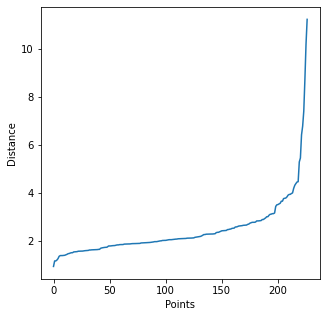

In [18]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=30)
neighbors = nearest_neighbors.fit(X_scaled)

distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:,3], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

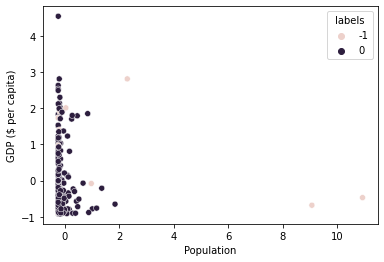

Punti identificati come rumore:  15


In [30]:

model = DBSCAN(eps=4, min_samples=40)
model.fit(X_scaled)

labels = model.labels_

labels = pd.Series(labels, index = X_scaled.index, name='labels')

labeled_df = X_scaled.join(labels)
sns.scatterplot(x='Population', y='GDP ($ per capita)', data=labeled_df, hue='labels')
plt.show()

print('Punti identificati come rumore: ', (labels==-1).sum())

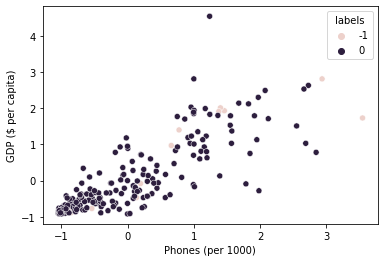

Punti identificati come rumore:  15


In [26]:
model = DBSCAN(eps=4, min_samples=40)
model.fit(X_scaled)

labels = model.labels_

labels = pd.Series(labels, index = X_scaled.index, name='labels')

labeled_df = X_scaled.join(labels)
sns.scatterplot(x='Phones (per 1000)', y='GDP ($ per capita)', data=labeled_df, hue='labels')
plt.show()

print('Punti identificati come rumore: ', (labels==-1).sum())

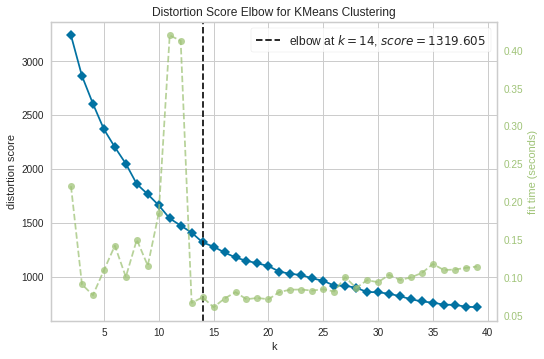

In [35]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_clusters=2)
visualizer = KElbowVisualizer(model, k=range(2,40))
visualizer = visualizer.fit(X_scaled)
visualizer.show()


Avg Sihlouette Score:  0.21896485354204917


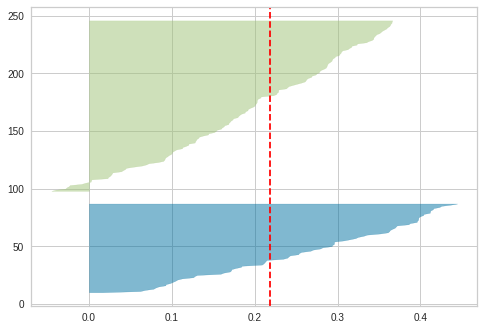


Avg Sihlouette Score:  0.1709839998734132


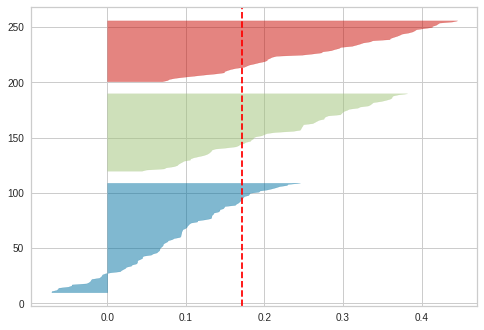


Avg Sihlouette Score:  0.1744287371886332


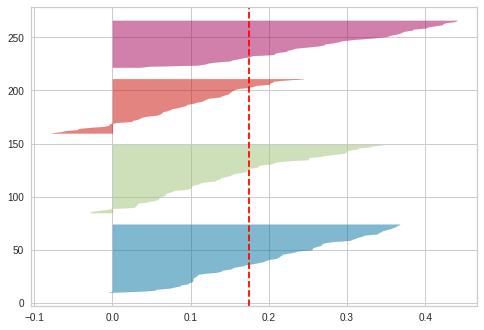


Avg Sihlouette Score:  0.17625120792754378


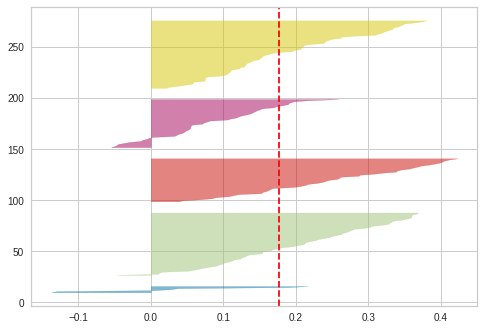


Avg Sihlouette Score:  0.1831626717706163


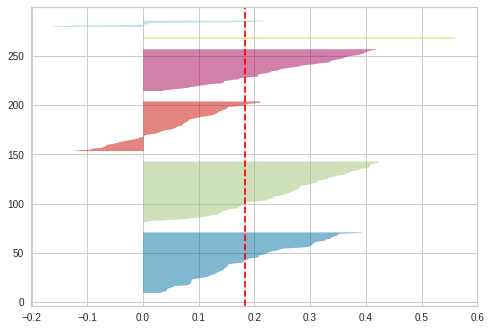

In [37]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X_scaled)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()
